[View in Colaboratory](https://colab.research.google.com/github/kintarou/django-starter/blob/master/plot_iris_pandas_sklearn.ipynb)

([], <a list of 0 Text yticklabel objects>)

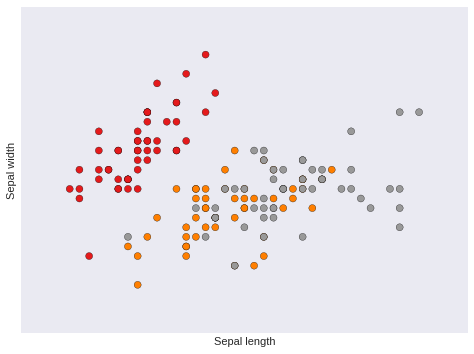

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

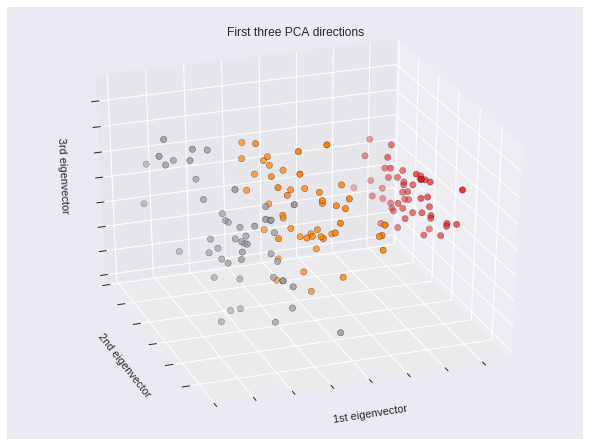

In [2]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

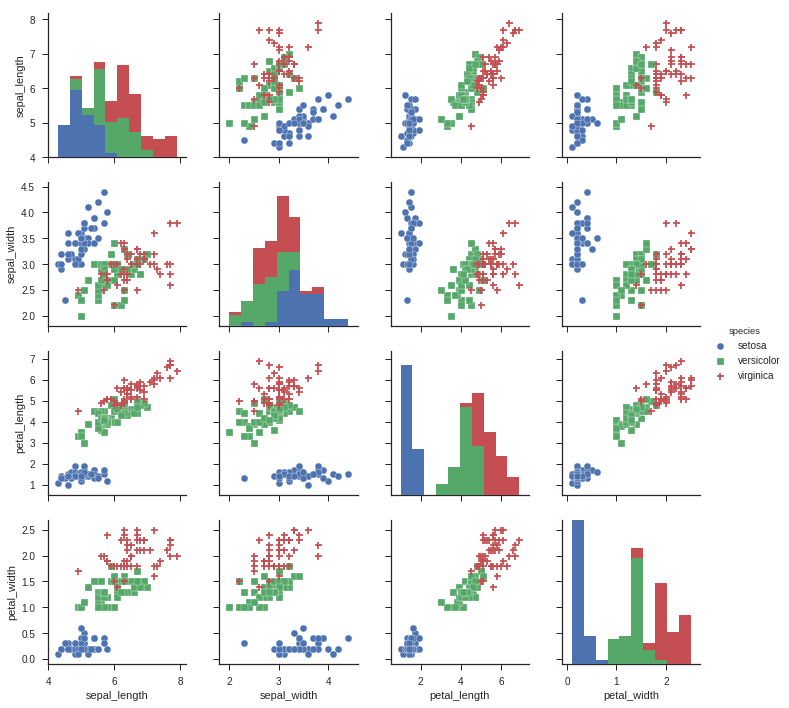

In [4]:
import seaborn as sns

sns.set(style="ticks")

df = sns.load_dataset("iris")

# http://seaborn.pydata.org/generated/seaborn.pairplot.html
sns.pairplot(df, hue='species', markers=["o", "s", "+"])

In [6]:
# with pandas
import pandas as pd
iris_data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
print(iris_data.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [7]:
iris_label = pd.Series(data=iris.target)
print(iris_label.head())

0    0
1    0
2    0
3    0
4    0
dtype: int64


In [8]:
print(len(iris_data))

150


In [10]:
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn import datasets, model_selection, svm, metrics
data_train, data_test, label_train, label_test = model_selection.train_test_split(iris_data, iris_label)
print(data_train.head())

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
130                7.4               2.8                6.1               1.9
118                7.7               2.6                6.9               2.3
8                  4.4               2.9                1.4               0.2
39                 5.1               3.4                1.5               0.2
98                 5.1               2.5                3.0               1.1


In [11]:
data_train, data_test, label_train, label_test = model_selection.train_test_split(iris_data, iris_label)

print(data_train.head())

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
56                 6.3               3.3                4.7               1.6
54                 6.5               2.8                4.6               1.5
147                6.5               3.0                5.2               2.0
0                  5.1               3.5                1.4               0.2
79                 5.7               2.6                3.5               1.0


In [12]:
print(len(data_train), len(data_test))

112 38


In [13]:
clf = svm.SVC()
clf.fit(data_train, label_train)
pre = clf.predict(data_test)

print(type(pre))
print(pre)

<class 'numpy.ndarray'>
[1 2 2 0 0 2 0 1 1 0 2 0 0 0 2 2 2 1 0 2 2 1 2 0 1 0 0 1 0 0 0 0 2 2 1 2 2
 2]


In [14]:
ac_score = metrics.accuracy_score(label_test, pre)

print(ac_score)

1.0
